<a href="https://colab.research.google.com/github/naufal1910/airline_passenger_satisfaction_eda/blob/main/airline_passenger_satisfaction_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NAME : NAUFAL NAZARUDDIN
# CLASS : AI ENGINEER
# BATCH : 33
# SUBJECT : DATA ANALYST PROJECT PRESENTATION

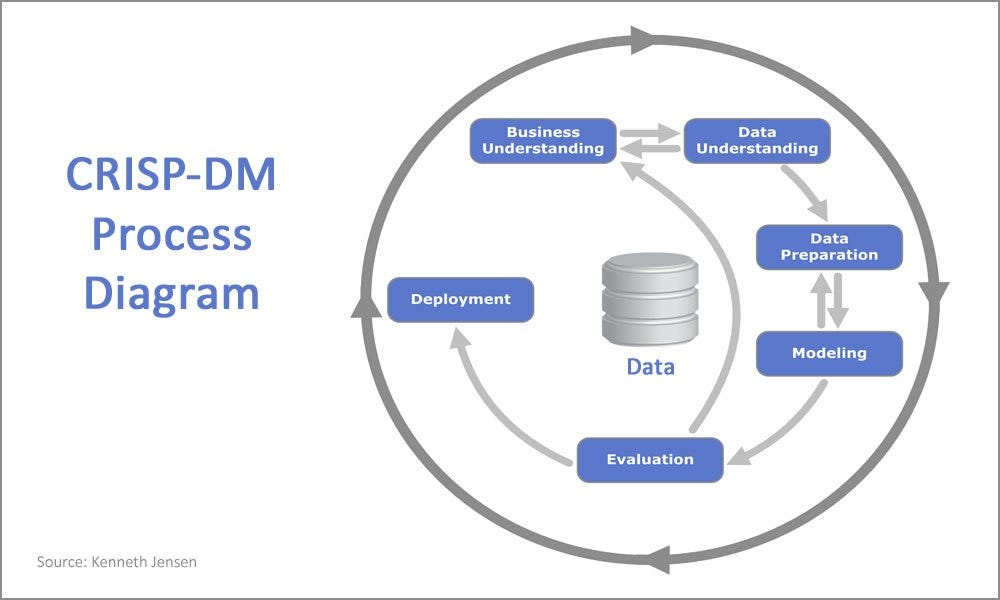

CRISP-DM (Cross-Industry Standard Process for Data Mining) is a robust and well-established methodology designed for data mining projects. This methodology provides a structured approach, enabling researchers to systematically handle complex data analysis tasks (Schröer et al., 2021).

# **Business Understanding**
In the competitive airline industry, customer satisfaction is a critical performance indicator that directly impacts customer retention, brand reputation, and overall profitability. Airlines continuously seek to improve service quality and operational efficiency by understanding what influences passengers' satisfaction levels.

This dataset presents results from a passenger satisfaction survey conducted by an airline company. It includes various aspects of the customer experience, such as inflight services, airport services, delays, and demographic information. Analyzing this data can help identify which factors most influence customer satisfaction and how different segments of customers perceive the airline’s service.

# **Data Understanding**

1. Dataset Overview
The dataset comprises over 100,000 rows of airline passenger survey data. Each row corresponds to a passenger's experience on a specific flight, along with their satisfaction label. There are 22 features plus the target variable Satisfaction, which is categorized as either:
  *   satisfied
  *   neutral or dissatisfied

2. Types of Data
The dataset contains:

Categorical variables: Gender, Customer Type, Type of Travel, Class, Satisfaction

Ordinal rating features: 1–5 scale for services (e.g., inflight wifi, food, seat comfort)

Numerical variables: Age, Flight Distance, Departure Delay, Arrival Delay

3. Dataset URL
https://drive.google.com/file/d/1f003StXuElaku7FP1vQw3APX1hHrFaAz/view?usp=sharing

Initialize

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Reading data

In [98]:
# read csv
data = pd.read_csv('train.csv')

In [99]:
# Table dimensions:
data.shape

(103904, 25)

In [89]:
# Each row represents a single passenger, and each column corresponds to a specific feature.
# Let's examine the first and last rows of the dataset.
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [90]:
data.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [91]:
# Let's take a closer look at the dataset data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

You may notice the following:

The Arrival Delay in Minutes column contains 310 missing values. Additionally, the first two features are not relevant for classification and should be removed. Several columns contain categorical values but are currently of type 'object' or 'int64'. These should be converted to the 'category' data type, which is specifically designed for storing categorical data efficiently.

In [92]:
data = data.drop(data.iloc[:,[0, 1]], axis = 1)

In [93]:
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
for col in data.columns[categorical_indexes]:
    data[col] = data[col].astype('category')

Now the dataset information looks like this:

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

**Data visualization and calculation of the main characteristics**

In [95]:
# Get summary information about quantitative or numerical features by calling the "describe" method with default parameters:
data.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


For each quantitative attribute, mean values, standard deviation, minimum and maximum values, median and quartile values are given.



In [96]:
# Now we get information about categorical features:
data.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


For each categorical feature, the total number of values, the number of unique values, the most frequently occurring element and the total number of such elements are given.



([<matplotlib.patches.Wedge at 0x7a20b7fe8350>,
 [Text(-0.2287050937018073, 1.0759618859954323, 'Neutral or dissatisfied'),
  Text(0.22870518776538568, -1.0759618660013932, 'Satisfied')],
 [Text(-0.12474823292825851, 0.586888301452054, '56.7%'),
  Text(0.1247482842356649, -0.5868882905462144, '43.3%')])

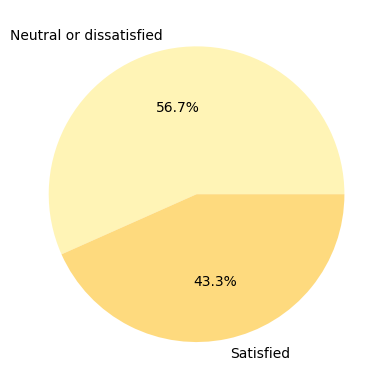

In [52]:
# Let's look at the ratio of the values of the target variable:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')

As you can see from the pie chart, the selection is more or less balanced.



In [53]:
# Let's calculate the correlation matrix for quantitative features and use the visual image of this matrix:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
corr_mat = numerical_data.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012147
Flight Distance,0.099461,1.000000,0.002158,-0.002426
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.965481
Arrival Delay in Minutes,-0.012147,-0.002426,0.965481,1.000000


<Axes: >

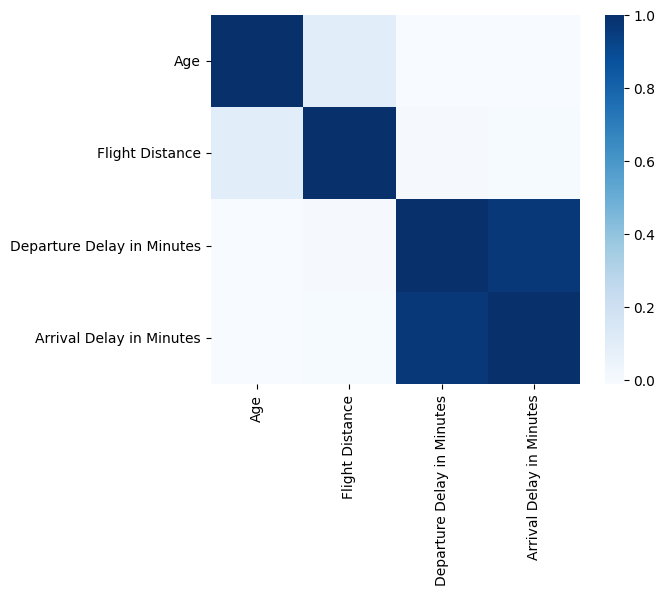

In [61]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')

In [64]:
# You can see that there is a strong correlation between the features 'Departure delay in minutes' and 'Arrival delay in minutes'. The value of the correlation coefficient reaches the following value:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

,,0
Departure Delay in Minutes,Arrival Delay in Minutes,0.965481


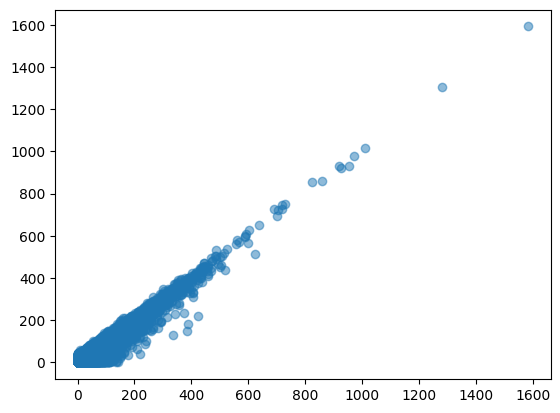

In [65]:
# Let's build a scatterplot for these features:
plt.scatter(data['Arrival Delay in Minutes'], data['Departure Delay in Minutes'], alpha = 0.5)

The data points generally align along a straight line from the lower left to the upper right corner, indicating an approximately linear relationship between departure delay and arrival delay.

This outcome is logically consistent and can be explained as follows: if a flight experiences a delay at departure, it is likely to arrive late by a similar margin—assuming the aircraft does not make up for the delay by increasing speed during the flight.

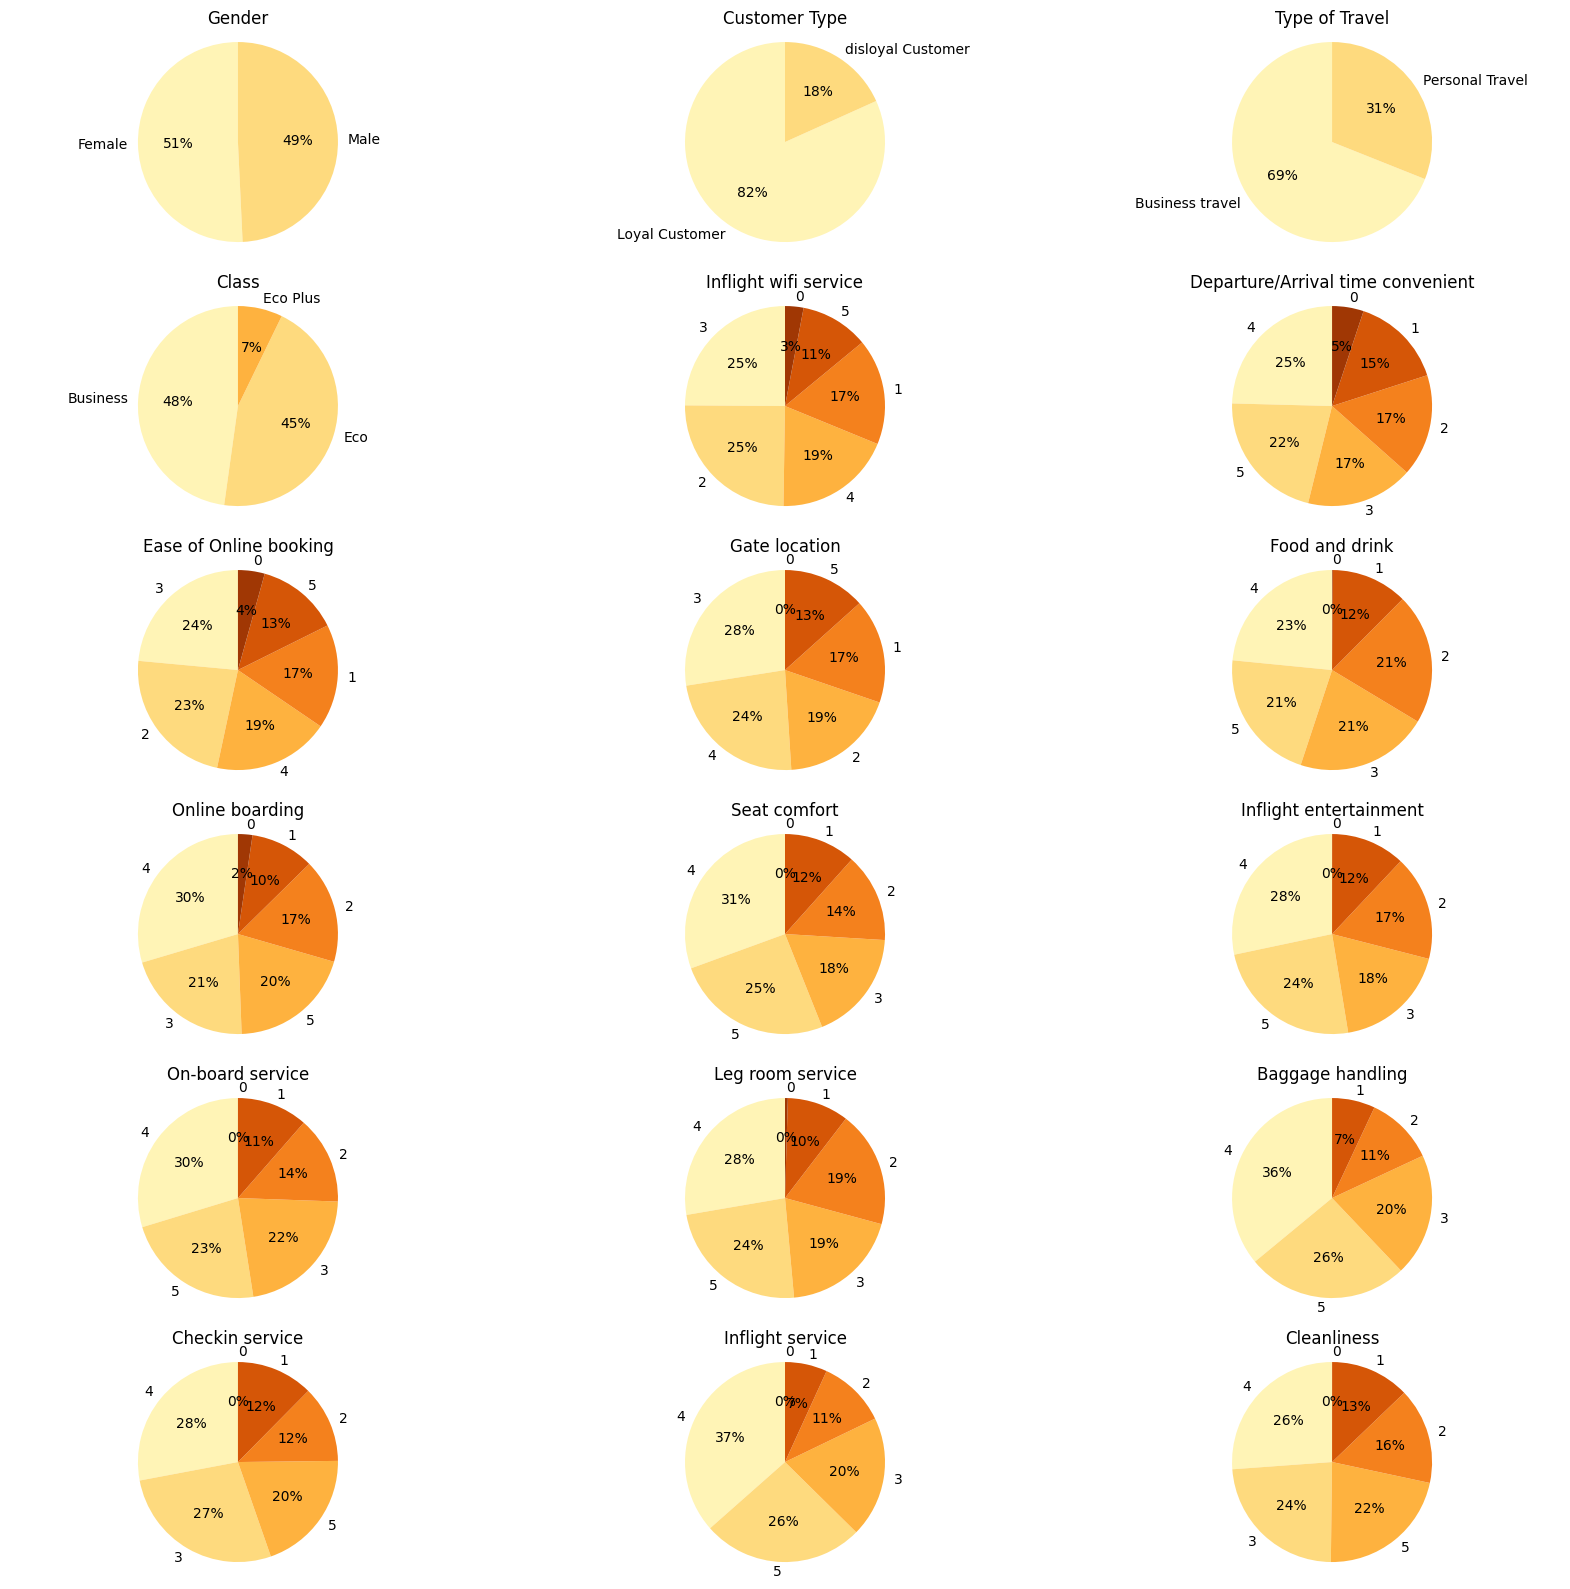

In [66]:
# Consider the ratio of values for each of the categorical features:
categ = data.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Key Insights from the Sample:

The number of male and female passengers is approximately equal.

The vast majority of passengers are loyal or repeat customers.

Most passengers traveled for business purposes rather than personal reasons.

Around half of the passengers flew in business class.

Over 60% of passengers were satisfied with the luggage transportation service (rated 4–5 out of 5).

More than 50% of passengers found their seats comfortable (rated 4–5 out of 5).

<Axes: xlabel='Age', ylabel='Count'>

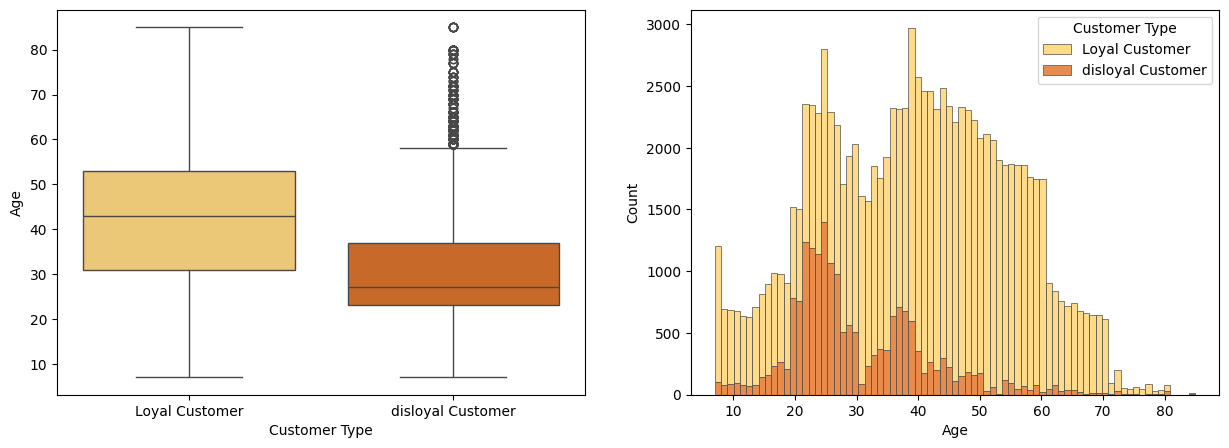

In [67]:
# Now let's look at a few "boxes with whiskers" (box diagrams).
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])


Based on the box plot, we can conclude that most of the airline's loyal customers are between the ages of 30 and 50, with an average age slightly above 40. In contrast, non-loyal customers tend to be younger, typically ranging from 25 to 40 years old, with an average age just below 30.

<Axes: xlabel='Age', ylabel='Count'>

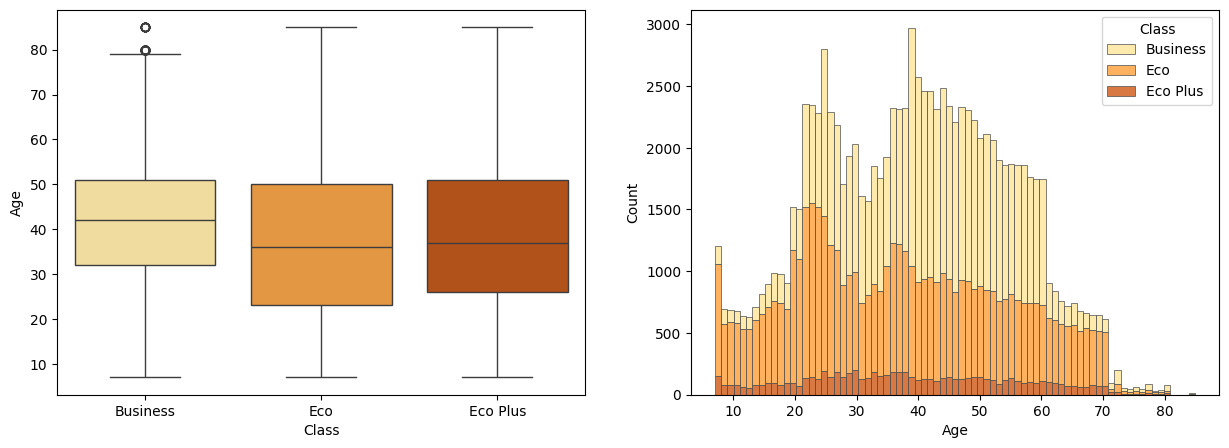

In [68]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])

It is evident that the average age range of business class passengers closely aligns with that of loyal customers, as shown in the previous box plot. This observation suggests that regular customers are more likely to purchase business class tickets for themselves.

<Axes: xlabel='Flight Distance', ylabel='Count'>

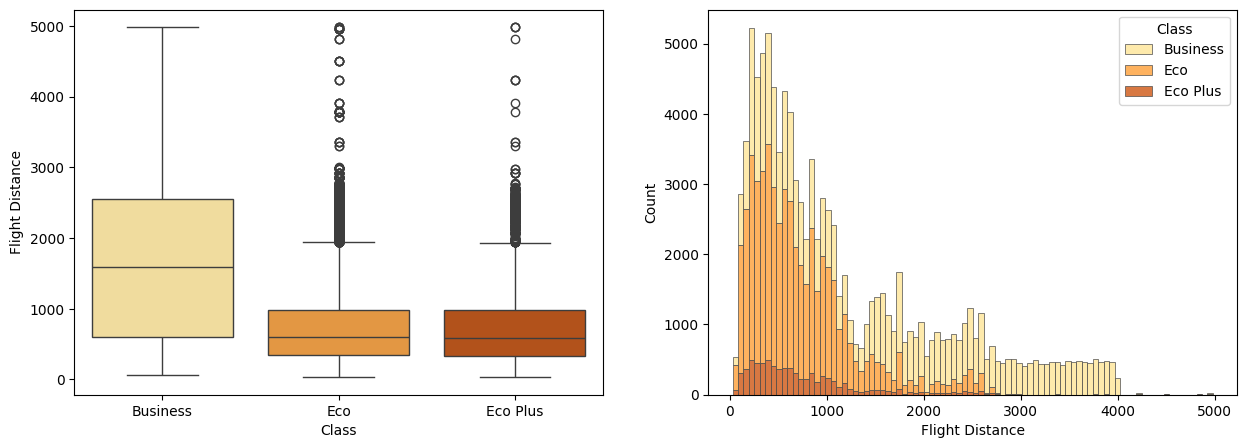

In [69]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])

From this box diagram, the following conclusion can be drawn: customers whose flight distance is long, mostly fly in business class.

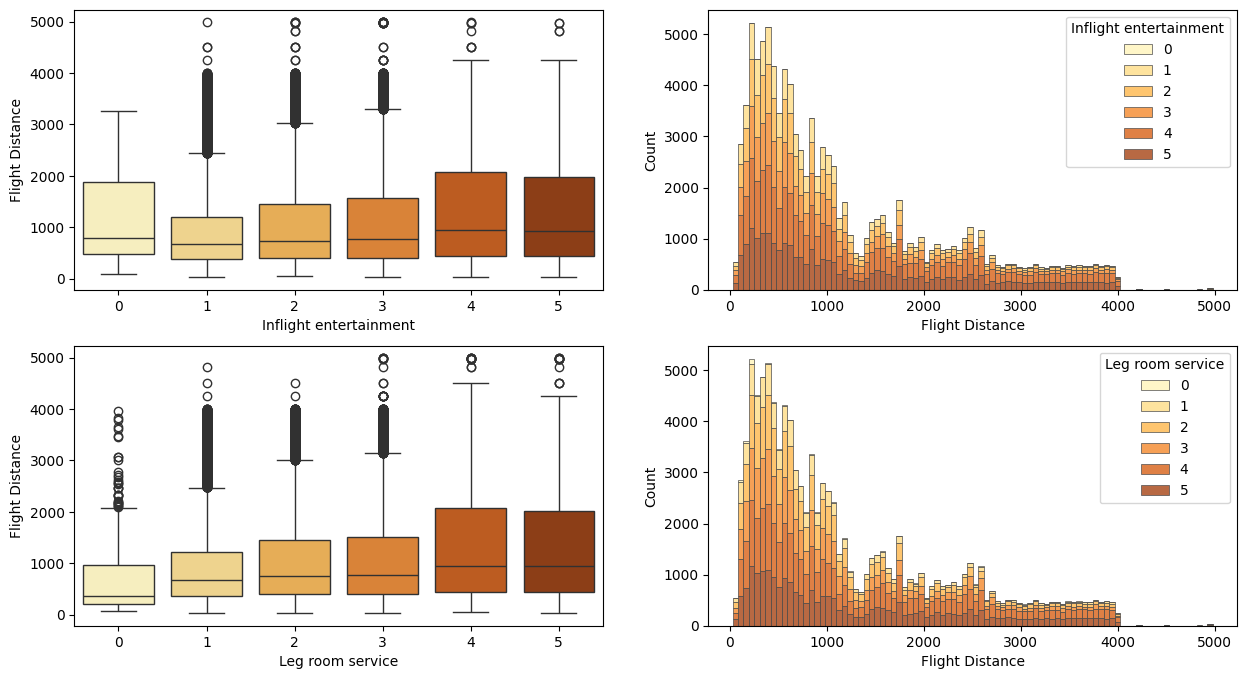

In [70]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[0, 0])
sns.histplot(data, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = data, ax = ax[1, 0])
sns.histplot(data, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])

A clear pattern emerges: the greater the flight distance, and thus the longer the time spent in the air, the higher the average passenger satisfaction with in-flight entertainment and extra legroom.

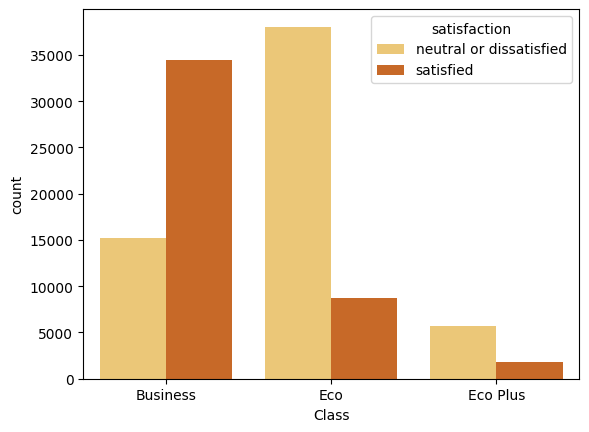

In [71]:
# Now consider the dependence graphs of some categorical features on the target - satisfaction of air passengers:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

This chart is very revealing. You can see that most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who were lucky enough to fly in business class were satisfied.

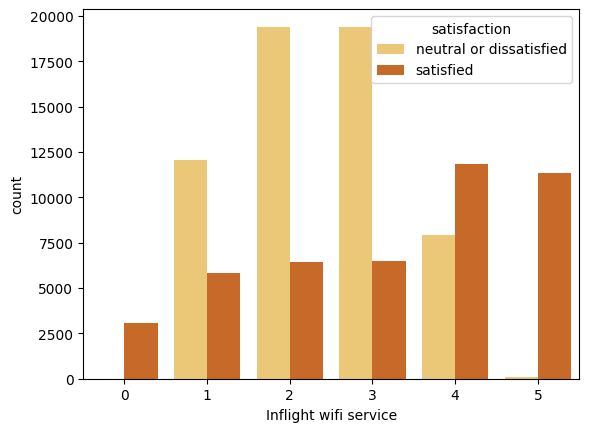

In [72]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = data)
plt.show()

According to this graph, you can see that almost all passengers who rated the wifi service 5 out of 5 points were satisfied with the flight.

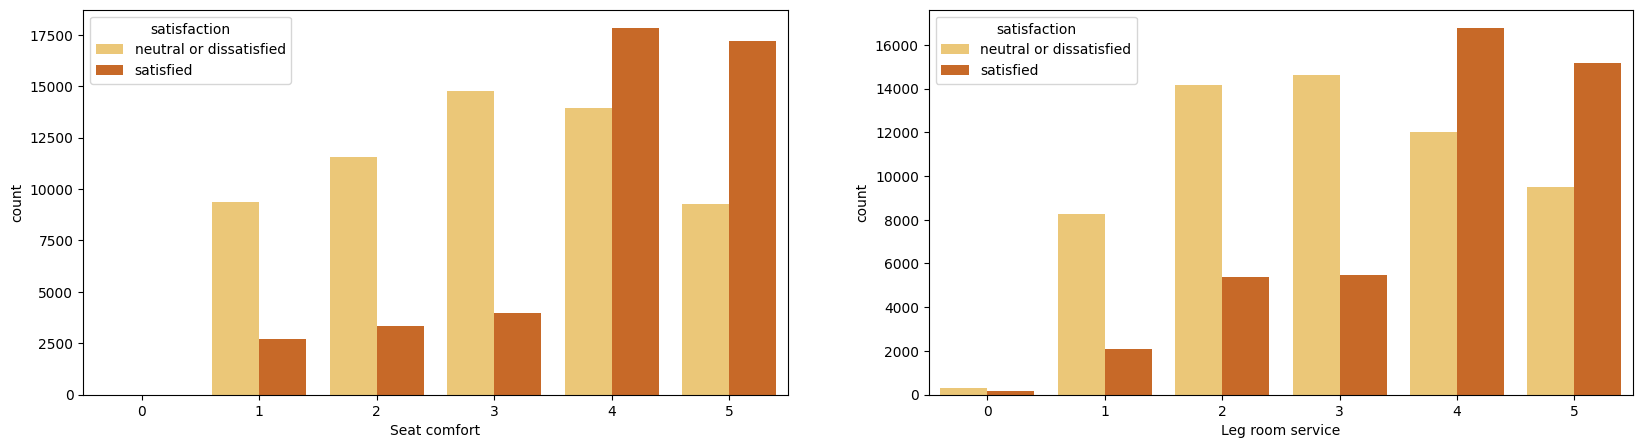

In [73]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = data,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = data, ax = ax[1])
plt.show()

From the graphs above, we can conclude the following: most passengers who rated the comfort of the seats and the extra legroom at 4 and 5 points out of 5 were satisfied with the flight.